## Support Vector Classifier Implementation

In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
## Lets create synthetic data points
from sklearn.datasets import make_classification

In [24]:
X,y=make_classification(n_samples=10000,n_features=2,n_classes=2,
                        n_clusters_per_class=2,n_redundant=0)

In [25]:
X

array([[-1.43021387, -0.64919794],
       [ 2.02739879, -0.04001768],
       [-0.75895556,  0.58606367],
       ...,
       [-2.16629229, -1.53325107],
       [ 0.61489265,  0.85971483],
       [ 1.65861913,  1.56416176]])

In [26]:
y

array([0, 1, 0, ..., 0, 1, 1])

In [27]:
pd.DataFrame(X)[0]

0      -1.430214
1       2.027399
2      -0.758956
3       0.719250
4      -0.360735
          ...   
9995    4.065822
9996    0.745158
9997   -2.166292
9998    0.614893
9999    1.658619
Name: 0, Length: 10000, dtype: float64

<AxesSubplot: xlabel='0', ylabel='1'>

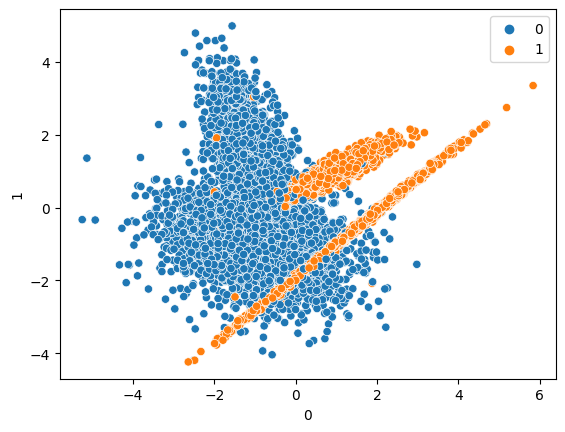

In [28]:
sns.scatterplot(x=pd.DataFrame(X)[0],y=pd.DataFrame(X)[1],hue=y)

In [29]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=10)

In [30]:
from sklearn.svm import SVC

In [31]:
svc=SVC(kernel='linear')

In [32]:
svc.fit(X_train,y_train)

SVC(kernel='linear')

In [33]:
svc.coef_

array([[ 1.58973131, -0.08920834]])

In [34]:
## Prediction
y_pred=svc.predict(X_test)

In [35]:
y_pred

array([0, 1, 0, ..., 1, 1, 1])

In [36]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [37]:
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.86      0.87      1258
           1       0.86      0.88      0.87      1242

    accuracy                           0.87      2500
   macro avg       0.87      0.87      0.87      2500
weighted avg       0.87      0.87      0.87      2500

[[1087  171]
 [ 151 1091]]
0.8712


## Hyperparametere Tuning With SVC

In [38]:
from sklearn.model_selection import GridSearchCV

# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel':['linear']
              }

In [39]:
grid=GridSearchCV(SVC(),param_grid=param_grid,refit=True,cv=5,verbose=3)

In [40]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.886 total time=   0.5s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.877 total time=   0.5s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.887 total time=   0.6s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.875 total time=   0.6s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.879 total time=   0.5s
[CV 1/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.886 total time=   0.5s
[CV 2/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.877 total time=   0.5s
[CV 3/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.887 total time=   0.6s
[CV 4/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.875 total time=   0.6s
[CV 5/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.879 total time=   0.4s
[CV 1/5] END ..C=0.1, gamma=0.01, kernel=linear;, score=0.886 total time=   0.5s
[CV 2/5] END ..C=0.1, gamma=0.01, kernel=linear

In [ ]:
grid.best_params_

{'C': 0.1, 'gamma': 1, 'kernel': 'linear'}

In [ ]:
## Prediction
y_pred4=grid.predict(X_test)
print(classification_report(y_test,y_pred4))
print(confusion_matrix(y_test,y_pred4))
print(accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.88      0.90       125
           1       0.89      0.93      0.91       125

    accuracy                           0.90       250
   macro avg       0.90      0.90      0.90       250
weighted avg       0.90      0.90      0.90       250

[[110  15]
 [  9 116]]
0.9
